In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [2]:
quandl.ApiConfig.api_key = 'aiCXQR75A4B_QGuisxmm'

In [3]:
GDP = quandl.get('FRED/GDP')

In [4]:
GDP.head()

Value
Date               
1947-01-01  243.164
1947-04-01  245.968
1947-07-01  249.585
1947-10-01  259.745
1948-01-01  265.742

In [5]:
GDP.shape

(300, 1)

In [6]:
type(GDP)

pandas.core.frame.DataFrame

In [7]:
gdp = GDP.reset_index()

In [8]:
gdp.head()

Date    Value
0 1947-01-01  243.164
1 1947-04-01  245.968
2 1947-07-01  249.585
3 1947-10-01  259.745
4 1948-01-01  265.742

In [9]:
from datetime import datetime

gdp['datetime'] = pd.to_datetime(gdp['Date']) # Create a datetime column from "Date.""
gdp = gdp.set_index('datetime') # Set the datetime as the index of the dataframe.
gdp.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
gdp.head()

Value
datetime           
1947-01-01  243.164
1947-04-01  245.968
1947-07-01  249.585
1947-10-01  259.745
1948-01-01  265.742

In [10]:
gdp

Value
datetime             
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
1947-10-01    259.745
1948-01-01    265.742
...               ...
2020-10-01  21477.597
2021-01-01  22038.226
2021-04-01  22740.959
2021-07-01  23202.344
2021-10-01  23992.355

[300 rows x 1 columns]

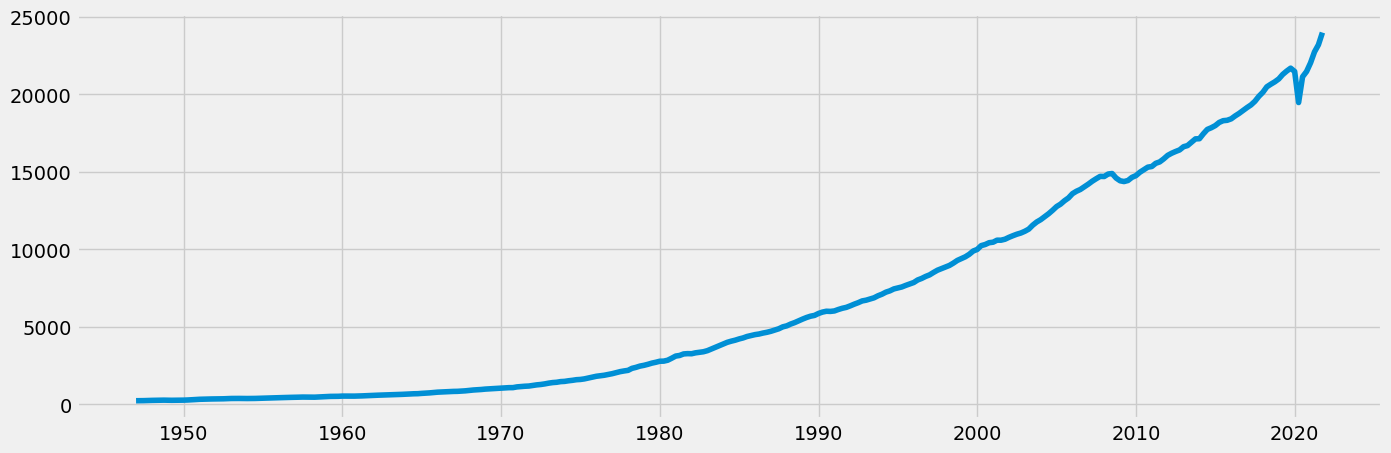

In [11]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(gdp)

## (The X-axis is the year, Y-axis is the GDP in billions)

In [13]:
decomposition = sm.tsa.seasonal_decompose(gdp, model='additive')

In [14]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

In [15]:
decomposition.plot()
plt.show()

# The GDP(Gross Domestic Product) of the U.S. has increase since 1950, Meaning the U.S. has produced about 243 billion in 1950 to almost 24 trillion in 202. The GDp had a few drop offs in 2008 and 2020 to represent the tough years the U.S. went through.
# The trend is increasing.
# Seansonality is regular
# There is not much noise aside from 2008 and 2020.

In [16]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(gdp['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   5.254722
p-value                          1.000000
Number of Lags Used              9.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64


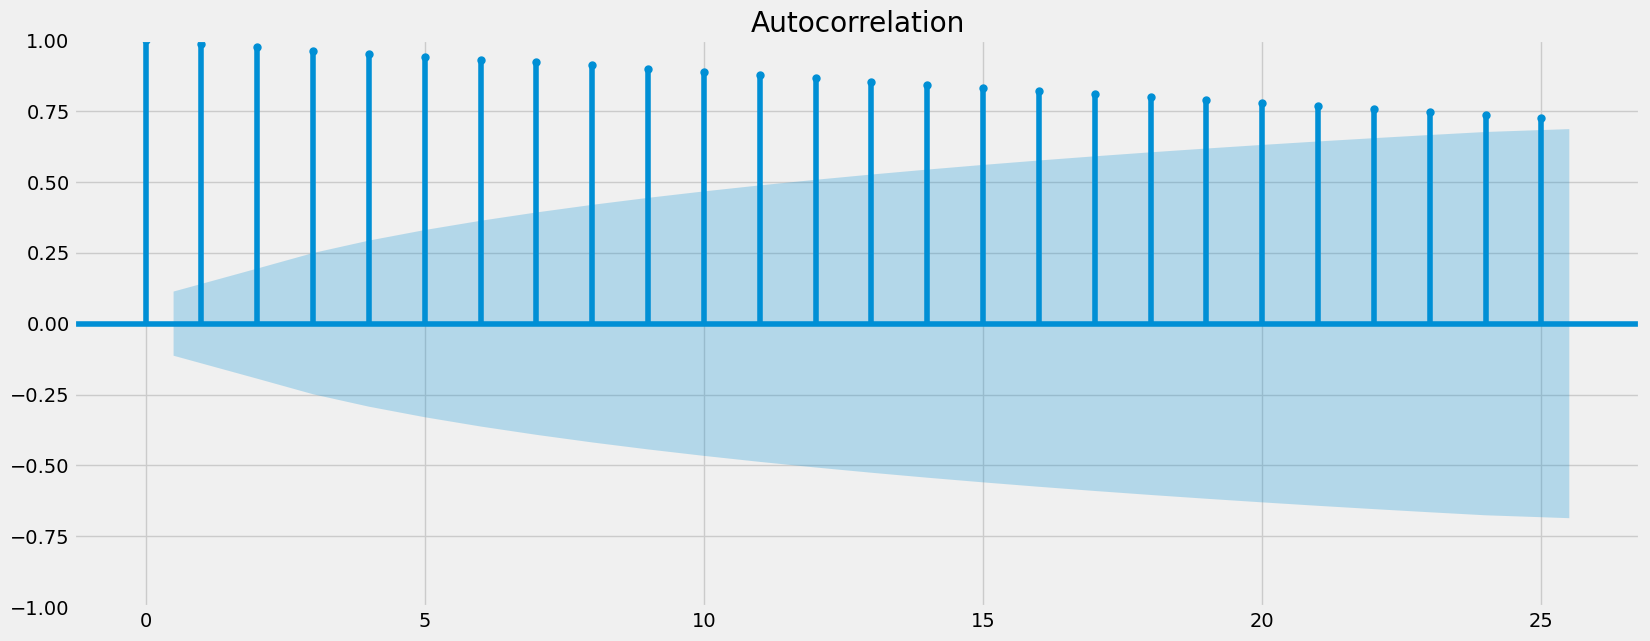

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(gdp)
plt.show()

# The data has many lags which means our data is not stationary. The null cannot be rejected as the test statistic is larger than the critical value

In [19]:
gdp_diff = gdp - gdp.shift(1)

In [20]:
gdp_diff.dropna(inplace = True)

In [29]:
gdp_diff.head()

Value
datetime          
1947-04-01   2.804
1947-07-01   3.617
1947-10-01  10.160
1948-01-01   5.997
1948-04-01   6.825

In [22]:
gdp.columns

Index(['Value'], dtype='object')

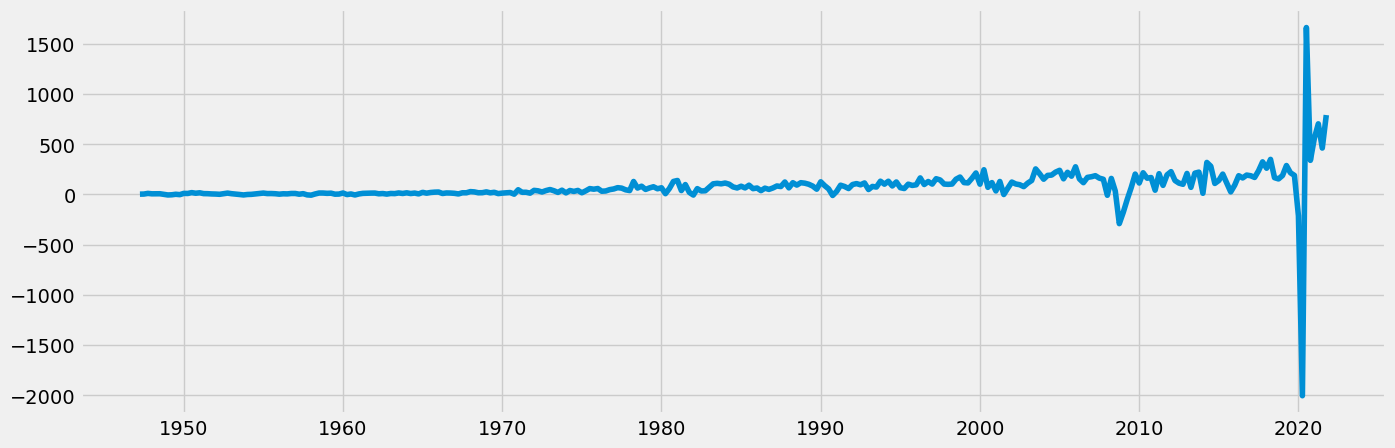

In [23]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(gdp_diff)

In [24]:
dickey_fuller(gdp_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.554274
p-value                          0.506512
Number of Lags Used             11.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64


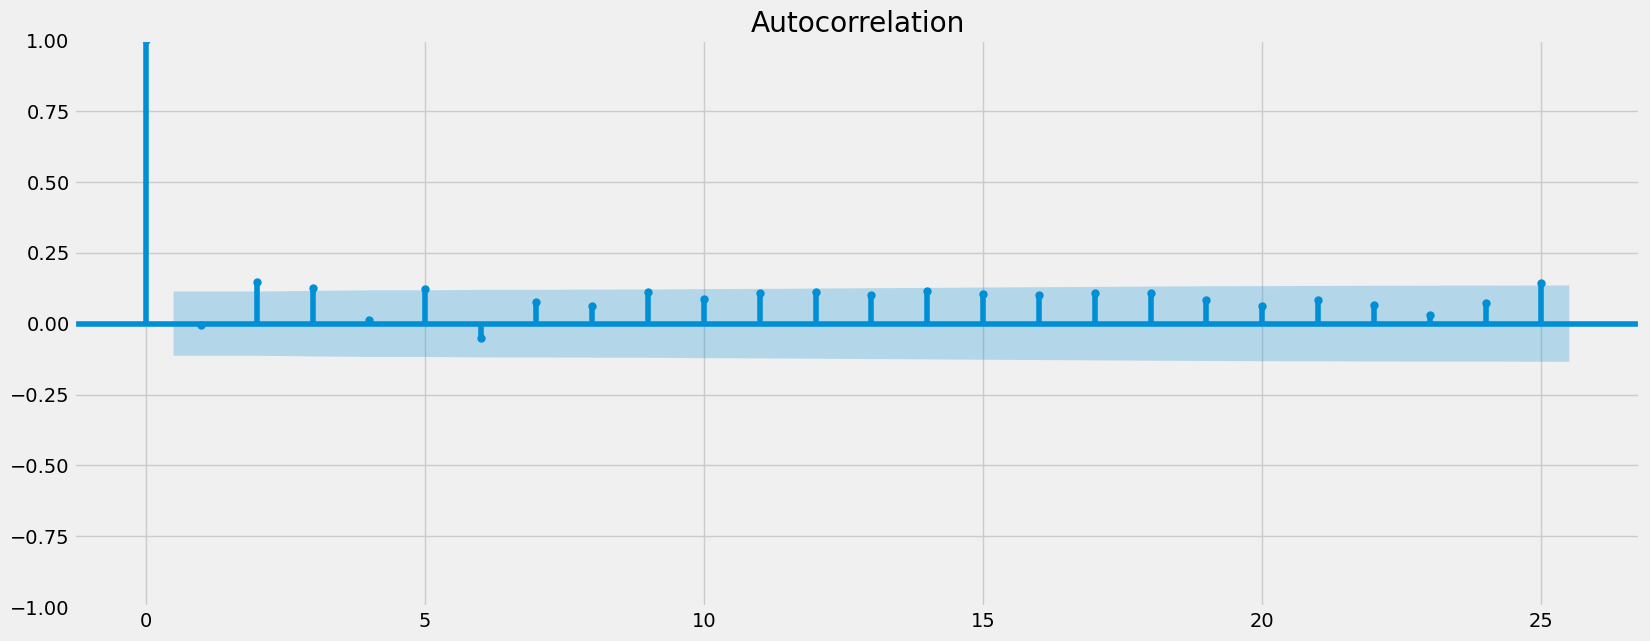

In [25]:
plot_acf(gdp_diff)
plt.show()

# The null cannot be rejected as the test statistic is larger than the critical value

In [27]:
gdp_diff2 = gdp_diff - gdp_diff.shift(1)

In [28]:
gdp_diff2.dropna(inplace = True)

In [30]:
gdp_diff2.head()

Value
datetime         
1947-07-01  0.813
1947-10-01  6.543
1948-01-01 -4.163
1948-04-01  0.828
1948-07-01 -0.196

In [31]:
gdp_diff2.columns

Index(['Value'], dtype='object')

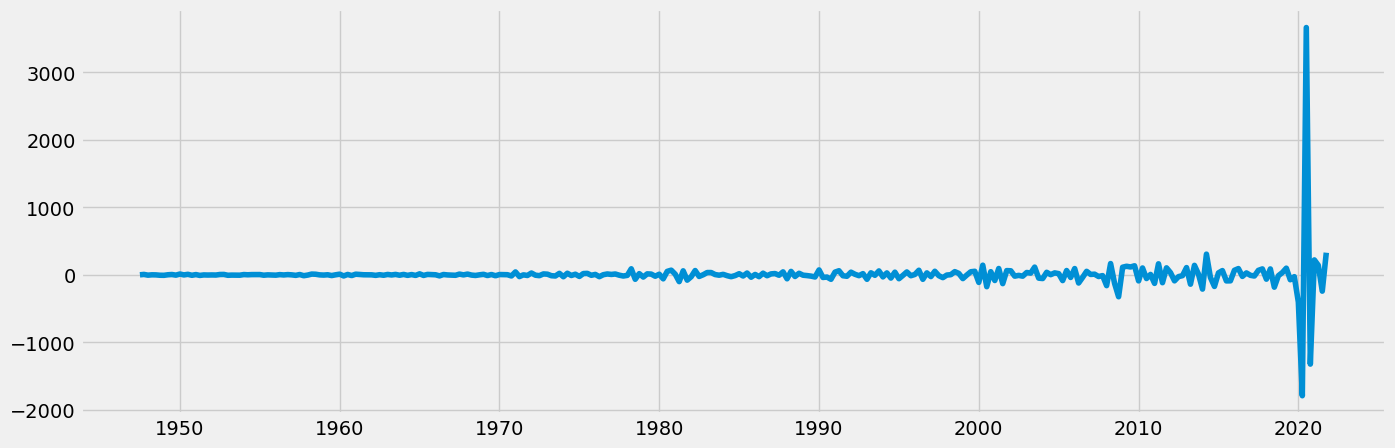

In [33]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(gdp_diff2)

In [34]:
dickey_fuller(gdp_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.613625e+00
p-value                        2.221370e-11
Number of Lags Used            1.600000e+01
Number of Observations Used    2.810000e+02
Critical Value (1%)           -3.453838e+00
Critical Value (5%)           -2.871881e+00
Critical Value (10%)          -2.572280e+00
dtype: float64


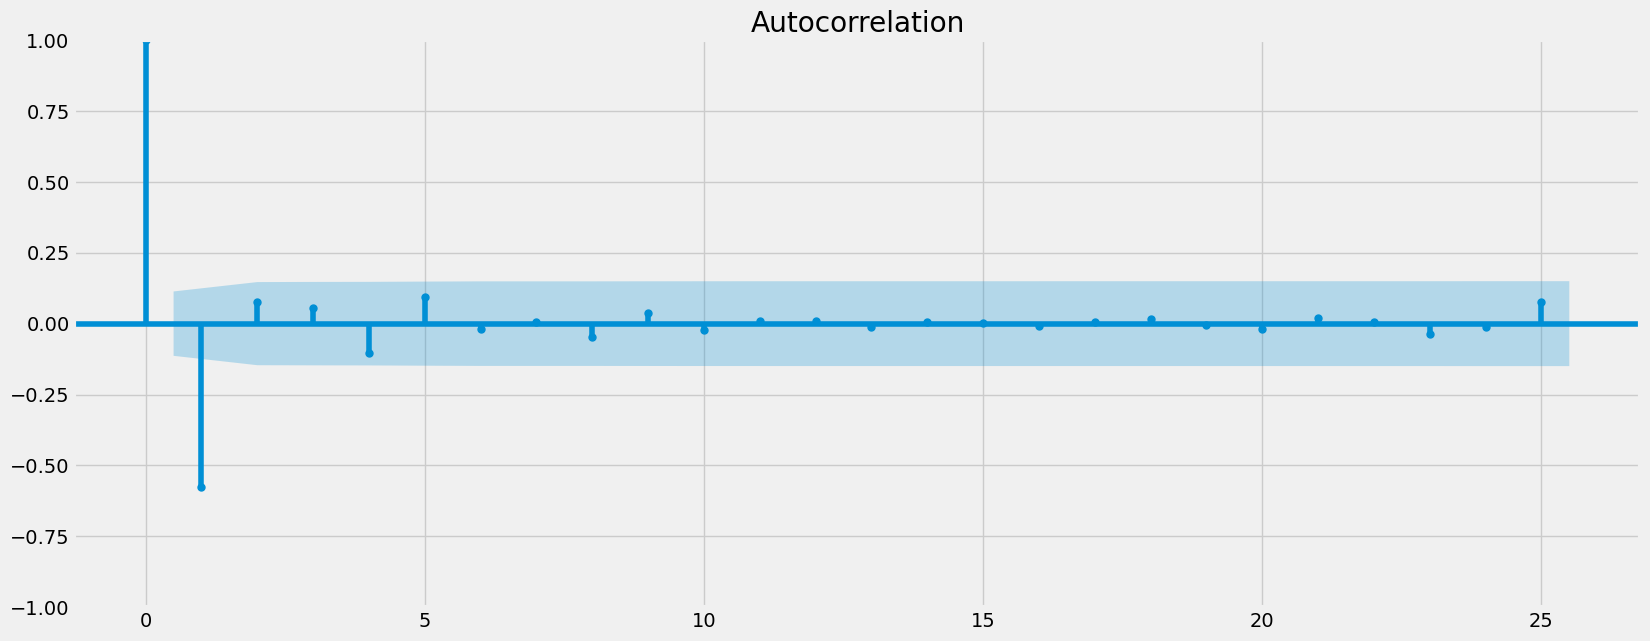

In [35]:
plot_acf(gdp_diff2)
plt.show()

# The null can be rejected as the test statistic is smaller than the critical value